## Case study
The client wants to better understand user behavior and improve its ecommerce platform. The management has identified several scenarios where more data could be helpful:
* Identify top products based on the total transaction revenue per day.
* Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.
* Identify the most profitable city or province based on the total transaction revenue.

<br>
ChatGPT : https://chat.openai.com/share/1ee8d9c9-5de6-45e2-bdb8-5e27cc34f702

### Data Preparation
---

In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


c:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# data overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,fullVisitorId,uint64,0,0.00,6655,"[2515546493837534633, 9361741997835388618, 731..."
1,channelGrouping,object,0,0.00,8,"[Organic Search, Referral, Direct, Social, Aff..."
2,time,int64,0,0.00,7837,"[966564, 157377, 228279, 1615618, 37832, 47890..."
3,country,object,0,0.00,106,"[Taiwan, France, United States, Canada, India,..."
4,city,object,0,0.00,171,"[(not set), not available in demo dataset, San..."
5,totalTransactionRevenue,float64,9381,93.81,364,"[nan, 67570000.0, 24710000.0, 123390000.0, 122..."
6,transactions,float64,9372,93.72,4,"[nan, 1.0, 2.0, 3.0, 6.0]"
7,timeOnSite,float64,287,2.87,1916,"[1567.0, 321.0, 927.0, 1616.0, 1222.0, 1569.0,..."
8,pageviews,float64,1,0.01,157,"[82.0, 8.0, 11.0, 13.0, 45.0, 48.0, 35.0, 41.0..."
9,sessionQualityDim,float64,9981,99.81,16,"[17.0, nan, 63.0, 38.0, 53.0, 87.0, 71.0, 62.0..."


### Identify top products based on the total transaction revenue per day
---

In [6]:
# make duplicate dataset
df_gpt = df.copy()

In [7]:
# Convert 'date' column to datetime
df_gpt['date'] = pd.to_datetime(df_gpt['date'])

# Group by date and product name and sum the transaction revenue
product_revenue_per_day = df_gpt.groupby(['date', 'v2ProductName'])['transactionRevenue'].sum().reset_index()

# Find the top product for each day
top_products = product_revenue_per_day.groupby('date')['transactionRevenue'].idxmax()
top_products_df = product_revenue_per_day.loc[top_products]

# Sort the DataFrame by date
top_products_df = top_products_df.sort_values('date')

# Display the top products per day
top_products_df

,date,v2ProductName,transactionRevenue
0,1970-01-01 00:00:00.020160801,1 oz Hand Sanitizer,0.0
11,1970-01-01 00:00:00.020160802,1 oz Hand Sanitizer,0.0
26,1970-01-01 00:00:00.020160803,Chevron Shopper,0.0
38,1970-01-01 00:00:00.020160804,1 oz Hand Sanitizer,0.0
51,1970-01-01 00:00:00.020160805,8 pc Android Sticker Sheet,0.0
...,...,...,...
1165,1970-01-01 00:00:00.020170726,Google Women's Short Sleeve Hero Tee Black,0.0
1167,1970-01-01 00:00:00.020170727,Google Women's Short Sleeve Hero Tee Black,0.0
1169,1970-01-01 00:00:00.020170728,Google Women's Short Sleeve Hero Tee Black,0.0
1171,1970-01-01 00:00:00.020170731,Metal Texture Roller Pen,0.0


Converting integer to datetime generates an invalid date

In [8]:
df1 = df.copy()

In [9]:
# try to convert datetime with format
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1['date'].head(5)

0   2017-07-21
1   2017-04-13
2   2017-07-27
3   2017-07-31
4   2017-07-28
Name: date, dtype: datetime64[ns]

In [11]:
# Group by date and product name and sum the transaction revenue
product_revenue_per_day = df1.groupby(['date', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()

# Find the top product for each day
top_products = product_revenue_per_day.groupby('date')['totalTransactionRevenue'].idxmax()
top_products_df = product_revenue_per_day.loc[top_products]

# Sort the DataFrame by date
top_products_df = top_products_df.sort_values('date')

# Display the top products per day
top_products_df

,date,v2ProductName,totalTransactionRevenue
2,2016-08-01,Chevron Shopper,144790000.0
13,2016-08-02,Chevron Shopper,191200000.0
26,2016-08-03,Chevron Shopper,0.0
44,2016-08-04,Google Lunch Bag,113850000.0
53,2016-08-05,Chevron Shopper,264780000.0
...,...,...,...
1166,2017-07-26,Metal Texture Roller Pen,67570000.0
1168,2017-07-27,Metal Texture Roller Pen,24710000.0
1169,2017-07-28,Google Women's Short Sleeve Hero Tee Black,0.0
1171,2017-07-31,Metal Texture Roller Pen,0.0


#### What days and top products have the highest revenue?

In [13]:
top_products_df.sort_values('totalTransactionRevenue', ascending=False)

,date,v2ProductName,totalTransactionRevenue
1133,2017-04-07,YouTube RFID Journal,6.831960e+09
317,2016-08-25,Sport Bag,6.239580e+09
276,2016-08-22,Collapsible Shopping Bag,5.982170e+09
823,2016-09-26,Electronics Accessory Pouch,2.708200e+09
968,2016-10-02,Google Pet Feeding Mat,2.535350e+09
...,...,...,...
1112,2017-02-18,Android Women's Fleece Hoodie,0.000000e+00
1111,2017-02-16,Google Men's Performance Full Zip Jacket Black,0.000000e+00
1110,2017-02-15,Google Tri-blend Hoodie Grey,0.000000e+00
1109,2017-02-11,Google Men's Watershed Full Zip Hoodie Grey,0.000000e+00


In April 27, 2017, the top products with the highest revenue were YouTube and RFID Journal.

I'm curious, within that time frame, what was the total revenue generated by the top products?

In [19]:
top_product = top_products_df[top_products_df['totalTransactionRevenue'] != 0]
top_product = top_product.groupby(['v2ProductName']).agg({'date': 'count', 'totalTransactionRevenue': 'sum'}).reset_index()
top_product.sort_values('totalTransactionRevenue', ascending=False)

,v2ProductName,date,totalTransactionRevenue
2,Collapsible Shopping Bag,6,8.514480e+09
31,YouTube RFID Journal,1,6.831960e+09
25,Sport Bag,3,6.762960e+09
3,Electronics Accessory Pouch,7,5.084560e+09
0,1 oz Hand Sanitizer,3,3.055740e+09
12,Google Pet Feeding Mat,2,3.037380e+09
18,Google Zipper-front Sports Bag,3,2.945510e+09
22,Reusable Shopping Bag,5,2.477920e+09
9,Google Lunch Bag,5,2.458050e+09
5,Google Canvas Tote Natural/Navy,6,2.403780e+09


From this, we can gather the insight that the top product with the highest revenue, YouTube RFID Journal, occurred only once. On the other hand, the Collapsible Shopping Bag had the highest revenue and became the top product a total of 6 times, which is a significant occurrence compared to the others.

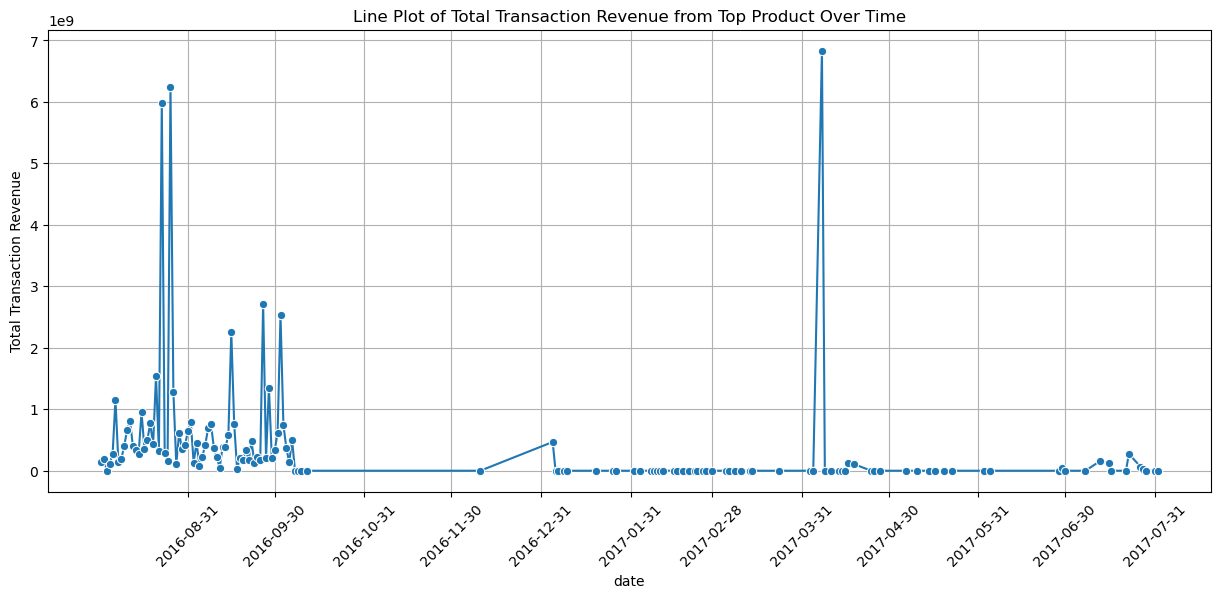

In [20]:
# visualize revenue from top product overtime

plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='totalTransactionRevenue', data=top_products_df, marker='o', linestyle='-')

date_range = pd.date_range(start=top_products_df['date'].min(), end=top_products_df['date'].max(), freq='M')
plt.xticks(ticks=date_range, rotation=45)
plt.ylabel('Total Transaction Revenue')
plt.title('Line Plot of Total Transaction Revenue from Top Product Over Time')
plt.grid(True)

In August and September, the website experienced a high number of purchases in the e-commerce section, but afterward, sales seemed to decline, followed by a significant spike in April. It may be worth reanalyzing why this occurred, or if it's due to a large number of null values in the dataset

### Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.
---

In [26]:
df2 = df1.copy()

In [27]:
df2['v2ProductName'].value_counts()

v2ProductName
Electronics Accessory Pouch                              906
Google Canvas Tote Natural/Navy                          845
Google Lunch Bag                                         835
Collapsible Shopping Bag                                 690
Google Tote Bag                                          675
                                                        ... 
Google Women's Convertible Vest-Jacket Sea Foam Green      1
Google Women's 1/4 Zip Jacket Charcoal                     1
Nest® Cam Outdoor Security Camera - USA                    1
Google Toddler Short Sleeve T-shirt Yellow                 1
Google Men's 100% Cotton Short Sleeve Hero Tee White       1
Name: count, Length: 84, dtype: int64

I decided to clean the dataset, assuming that if a product purchase transaction occurs, the total revenue is not null

In [29]:
# collect data
df2 = df2[['date', 'v2ProductName', 'totalTransactionRevenue']]

In [31]:
# drop null value
df2.dropna(inplace=True)

In [32]:
# check null value
df2.isnull().sum()

date                       0
v2ProductName              0
totalTransactionRevenue    0
dtype: int64

In [33]:
df2['v2ProductName'].value_counts()

v2ProductName
Google Lunch Bag                                        51
Google Canvas Tote Natural/Navy                         49
Electronics Accessory Pouch                             45
Google Tote Bag                                         44
Collapsible Shopping Bag                                42
Reusable Shopping Bag                                   40
Waterpoof Gear Bag                                      27
Waterproof Gear Bag                                     27
Google Zipper-front Sports Bag                          26
Sport Bag                                               24
Straw Beach Mat                                         24
1 oz Hand Sanitizer                                     21
Google Sunglasses                                       21
Large Zipper Top Tote Bag                               19
Softsided Travel Pouch Set                              16
Chevron Shopper                                         15
SPF-15 Slim & Slender Lip Balm            

Procucts have a lot of unique value, so I will analyzing 10 top product

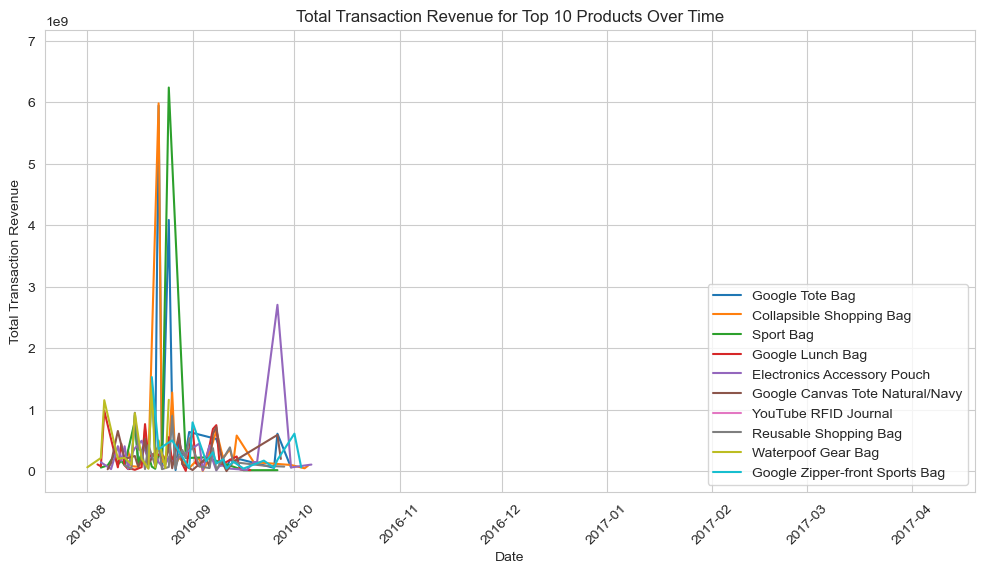

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the top 10 products based on totalTransactionRevenue
top_products = df2.groupby('v2ProductName')['totalTransactionRevenue'].sum().nlargest(10).index
df_top_10 = df2[df2['v2ProductName'].isin(top_products)]

# Group data by date and product name and sum totalTransactionRevenue
product_revenue_per_day = df_top_10.groupby(['date', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()

# Create a line plot for each product
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
for product in top_products:
    product_data = product_revenue_per_day[product_revenue_per_day['v2ProductName'] == product]
    plt.plot(product_data['date'], product_data['totalTransactionRevenue'], label=product)

plt.title('Total Transaction Revenue for Top 10 Products Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [49]:
product_revenue_per_day

,date,v2ProductName,totalTransactionRevenue
0,2016-08-01,Waterpoof Gear Bag,6.690000e+07
1,2016-08-04,Google Lunch Bag,1.138500e+08
2,2016-08-05,Electronics Accessory Pouch,1.487100e+08
3,2016-08-05,Google Lunch Bag,8.281000e+07
4,2016-08-05,Sport Bag,6.287000e+07
...,...,...,...
214,2016-10-03,Google Zipper-front Sports Bag,6.636000e+07
215,2016-10-04,Collapsible Shopping Bag,5.095000e+07
216,2016-10-05,Collapsible Shopping Bag,9.366000e+07
217,2016-10-06,Electronics Accessory Pouch,1.115300e+08


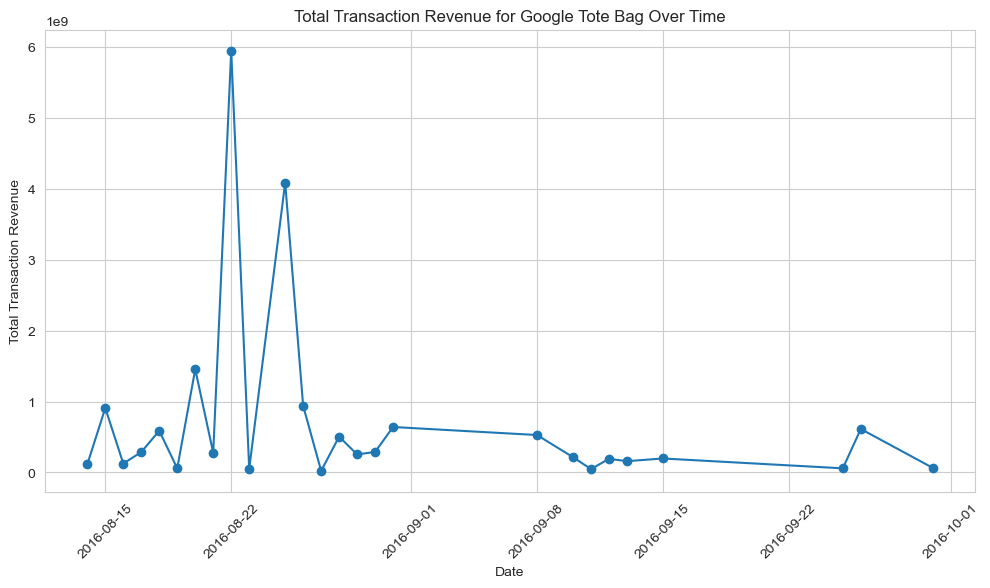

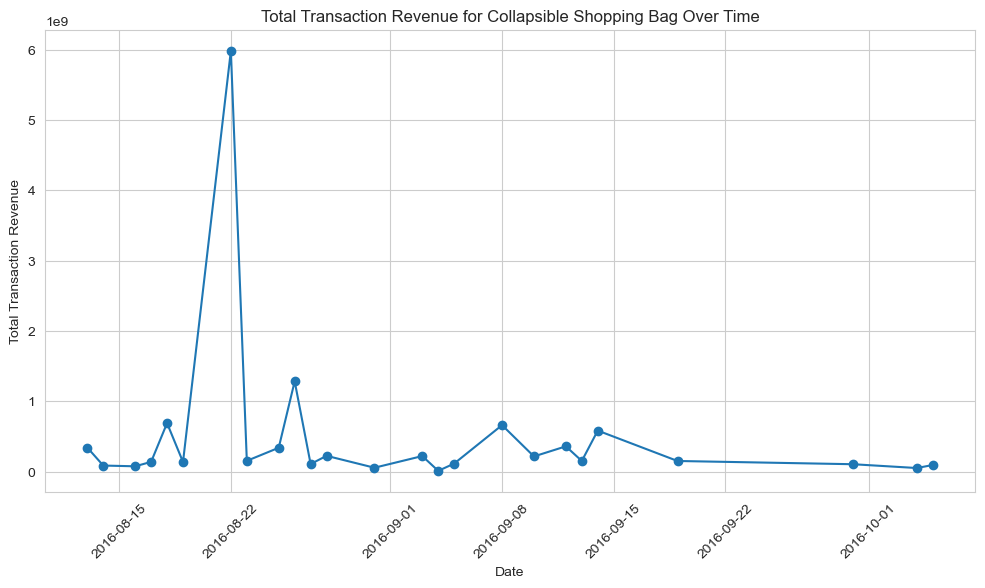

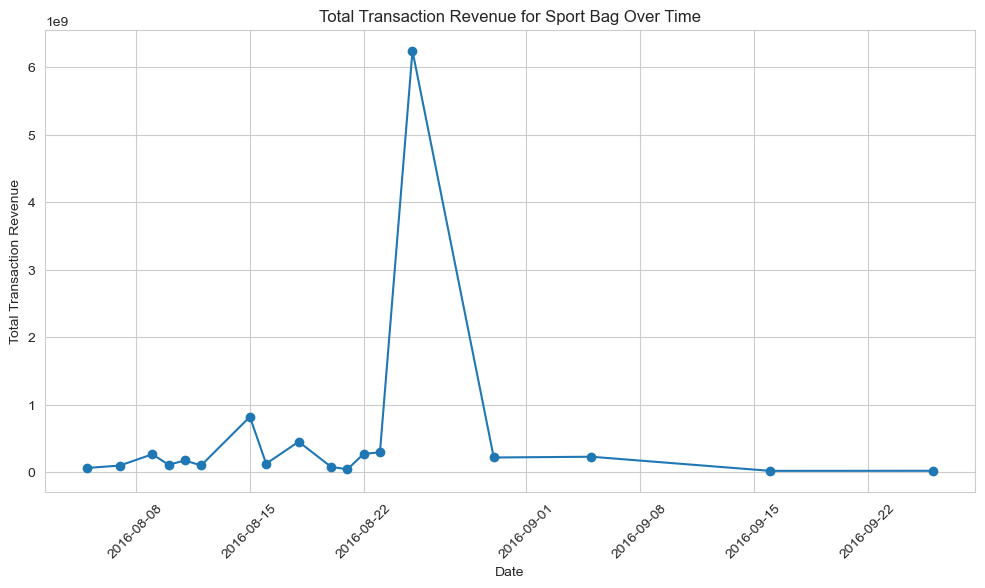

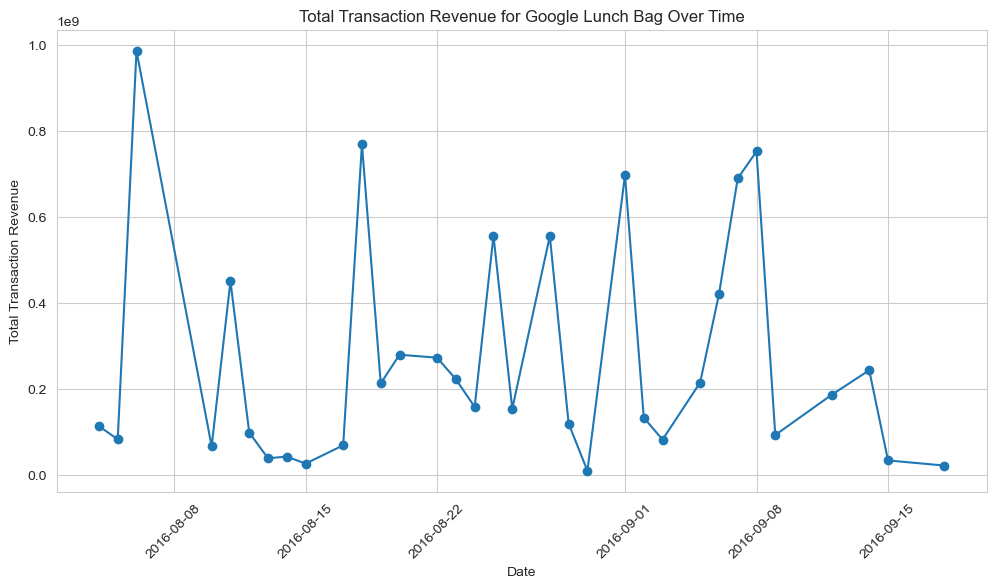

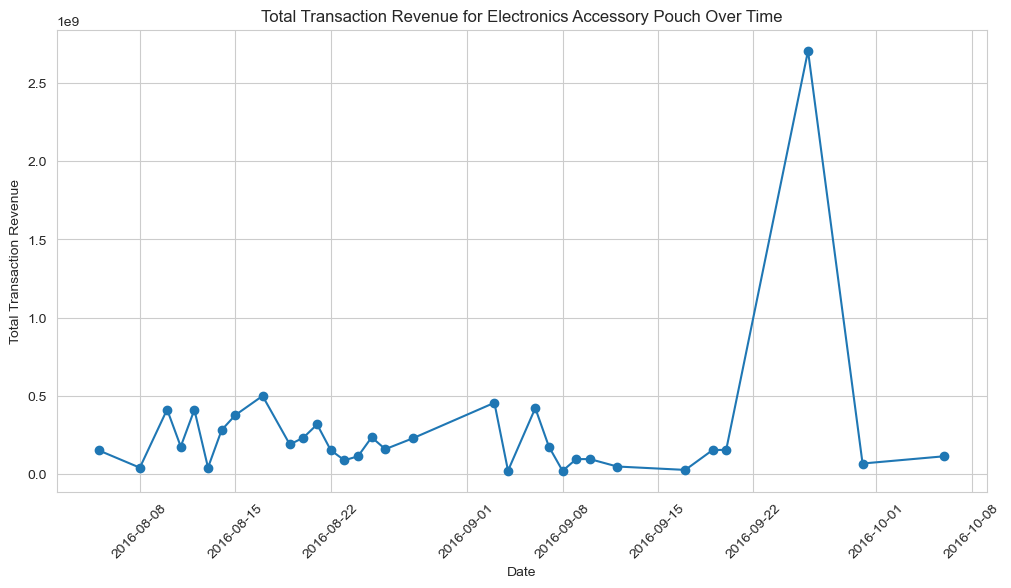

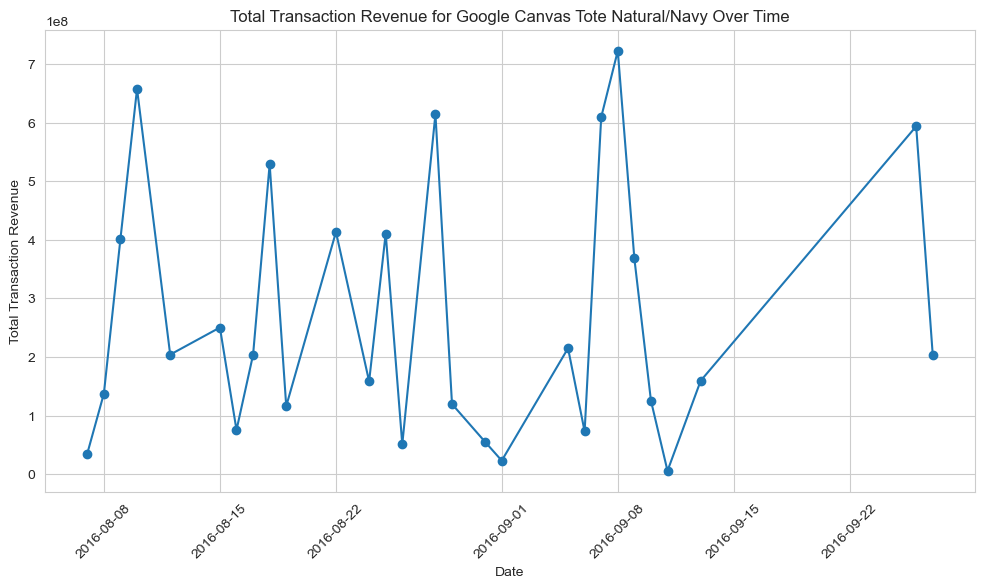

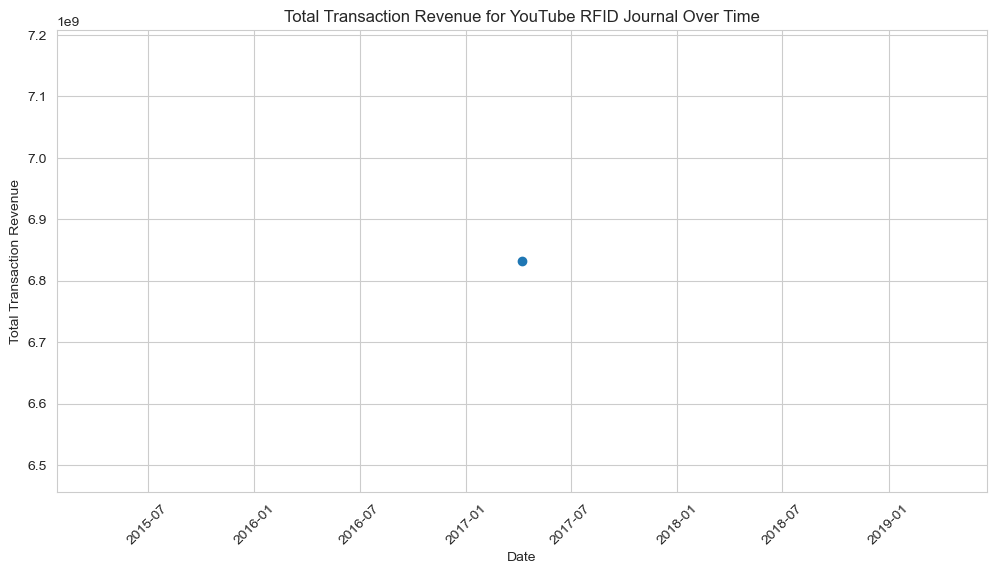

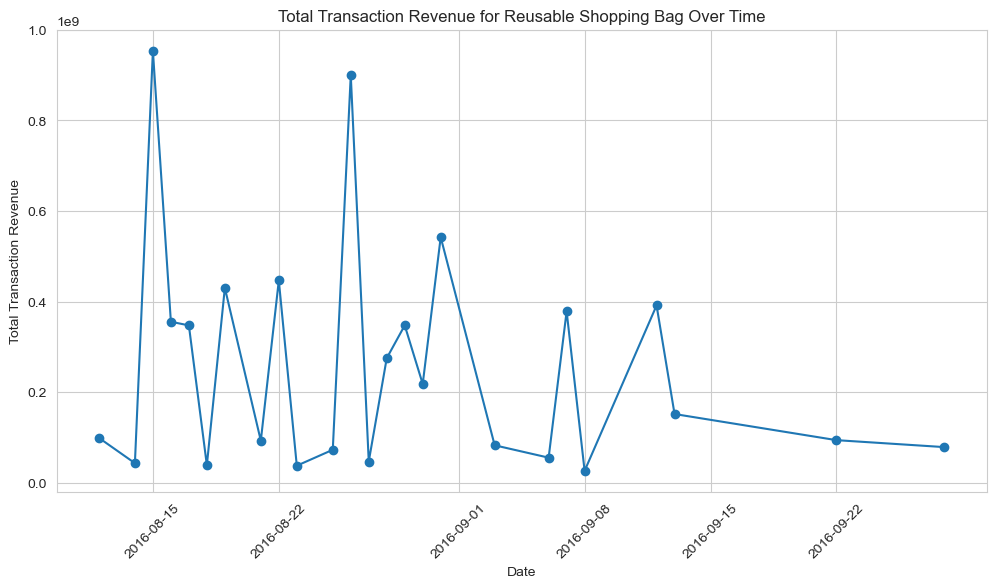

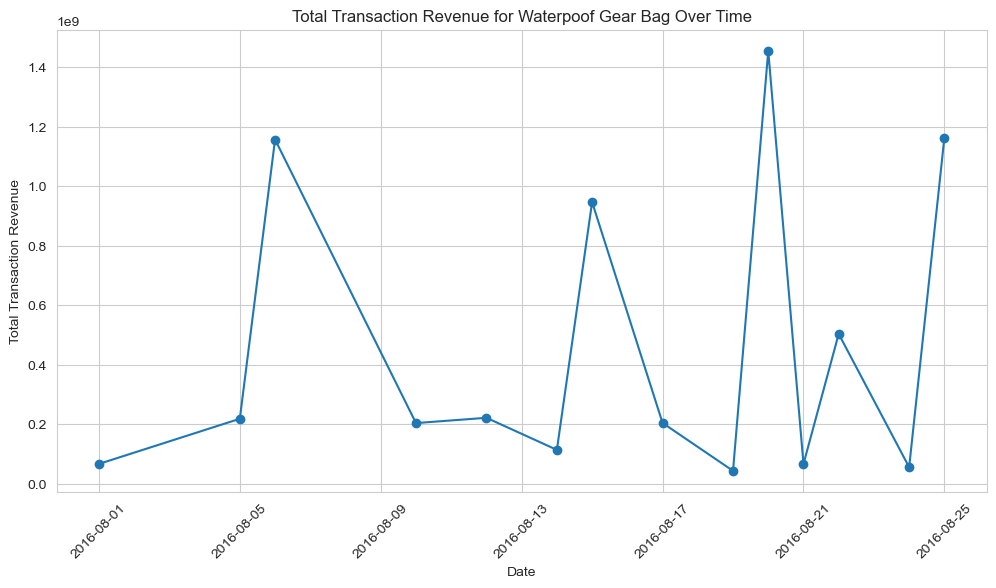

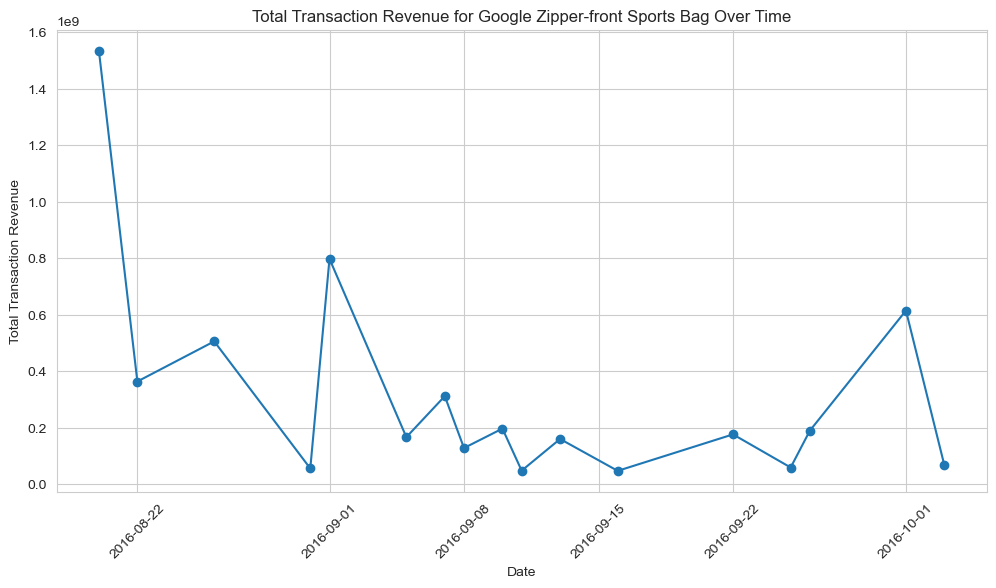

In [50]:
# Create a line plot for each product
for product in top_products:
    product_data = product_revenue_per_day[product_revenue_per_day['v2ProductName'] == product]
    
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    plt.plot(product_data['date'], product_data['totalTransactionRevenue'], marker='o', linestyle='-')
    
    plt.title(f'Total Transaction Revenue for {product} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Transaction Revenue')
    plt.xticks(rotation=45)
    
    plt.show()

There are anomaly:
- Google Tote Bag on August
- Collapsible Shopping Bag on August
- Sport Bag on August
- Electronics Accessory Pouch on September
- Zipper-front Sports Bags on August


###  Identify the most profitable city or province based on the total transaction revenue.
---

In [52]:
df3 = df1.copy()
df3.columns

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option'],
      dtype='object')

In [54]:
# Group data by date and product name and sum totalTransactionRevenue
df3 = df1.copy()
profitable_location = df3.groupby(['country', 'city'])['totalTransactionRevenue'].sum().reset_index()
profitable_location.sort_values('totalTransactionRevenue', ascending=False)


,country,city,totalTransactionRevenue
300,United States,not available in demo dataset,5.418467e+10
271,United States,New York,2.125081e+10
287,United States,San Francisco,7.774340e+09
305,Venezuela,not available in demo dataset,7.191120e+09
270,United States,Mountain View,5.713290e+09
...,...,...,...
105,Israel,not available in demo dataset,0.000000e+00
104,Israel,Tel Aviv-Yafo,0.000000e+00
103,Isle of Man,(not set),0.000000e+00
102,Ireland,not available in demo dataset,0.000000e+00


I will identify the country with the highest revenue and then conduct a more detailed analysis of cities within that country. This can be a valuable strategy for the company to optimize its market presence and tailor its efforts more effectively, ultimately leading to increased revenue and growth.

<AxesSubplot: xlabel='country'>

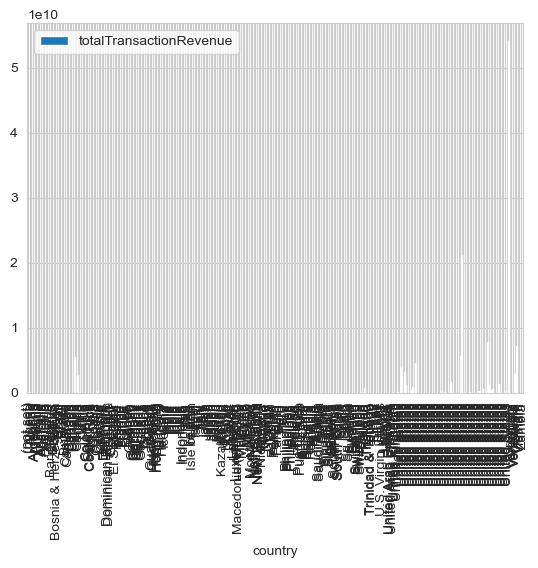

In [56]:
# visualize profitable country
profitable_location.plot.bar(x='country', y='totalTransactionRevenue')

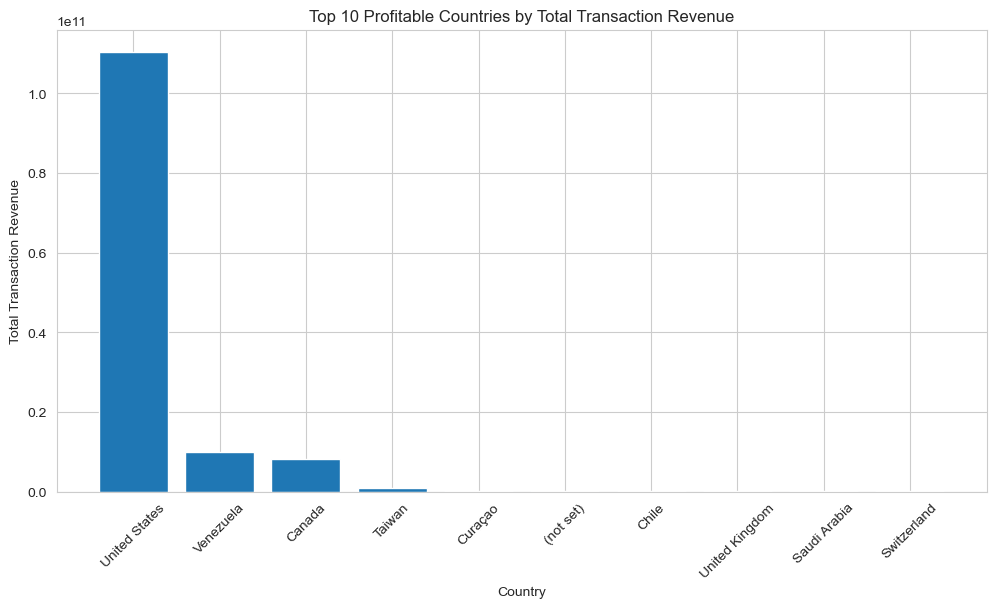

In [59]:
# Group data by 'country' and sum total transaction revenue
country_revenue = profitable_location.groupby('country')['totalTransactionRevenue'].sum().reset_index()

# Sort the data by total transaction revenue in descending order
country_revenue = country_revenue.sort_values(by='totalTransactionRevenue', ascending=False)

# Select the top 10 countries
top_10_countries = country_revenue.head(10)

# Create a bar plot for the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['country'], top_10_countries['totalTransactionRevenue'])
plt.title('Top 10 Profitable Countries by Total Transaction Revenue')
plt.xlabel('Country')
plt.ylabel('Total Transaction Revenue')
plt.xticks(rotation=45)
plt.show()


It appears that the United States generates the highest and significant revenue

In [60]:
# analyze city from United State
us = profitable_location[profitable_location['country']== 'United States']

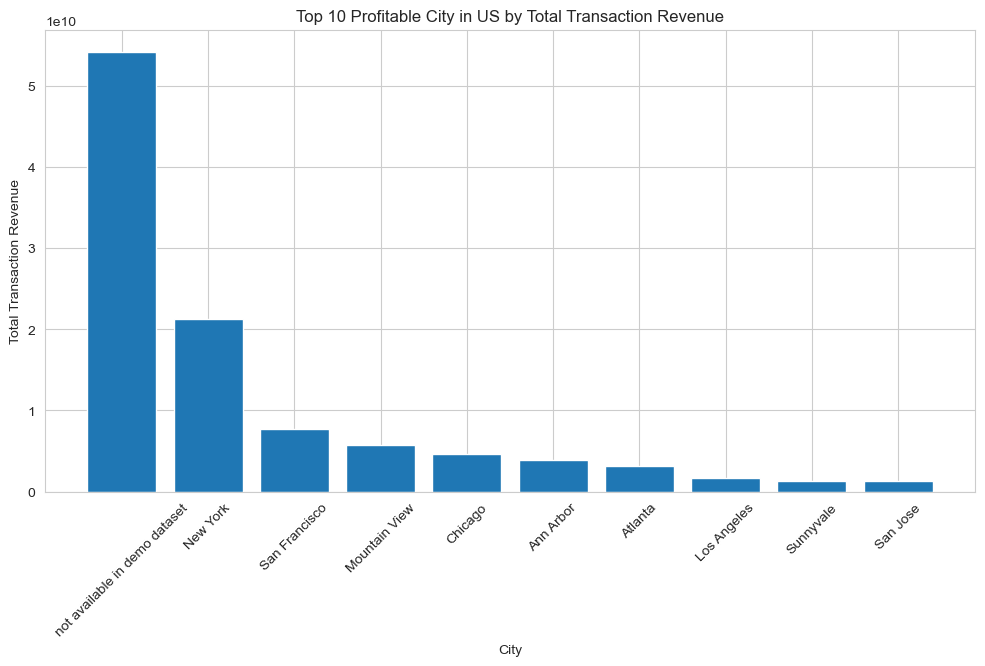

In [65]:
city_us = us.groupby('city')['totalTransactionRevenue'].sum().reset_index()
city_us = city_us.sort_values(by='totalTransactionRevenue', ascending=False)

# Select the top 10 countries
top_10_city = city_us.head(10)

# Create a bar plot for the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(top_10_city['city'], top_10_city['totalTransactionRevenue'])
plt.title('Top 10 Profitable City in US by Total Transaction Revenue')
plt.xlabel('City')
plt.ylabel('Total Transaction Revenue')
plt.xticks(rotation=45)
plt.show()

- "Not available in demo dataset" is the city with the highest revenue. This needs further analysis because this city is not identified in the dataset.
- Then New York ranks second, followed by San Francisco, and then Mountain View.
- The company's strategy should focus on investigating the high revenue from "Not available in demo dataset" and assessing if it's an anomaly or an undisclosed location that should be addressed. Simultaneously, optimizing strategies for New York, San Francisco, and Mountain View can enhance the company's presence and market performance in these cities, potentially leading to even higher revenue and growth